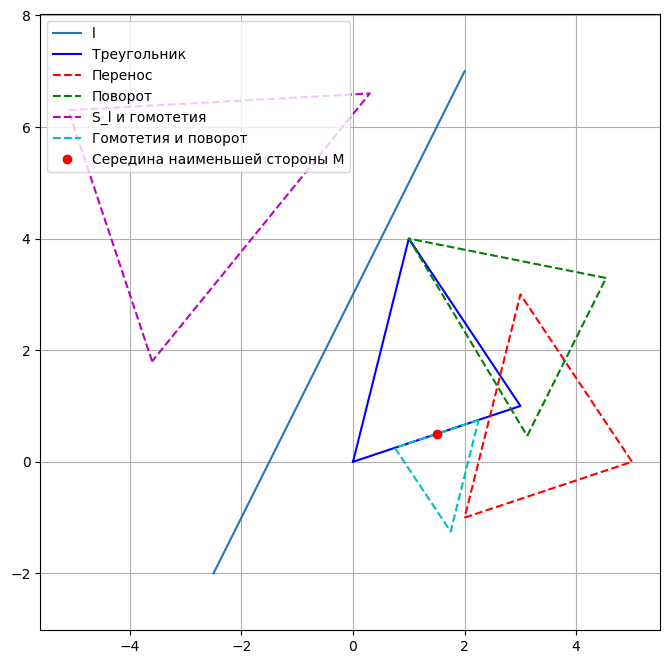

In [56]:
import math

import numpy as np
import matplotlib.pyplot as plt


def mid_of_shortest_side(vertices: np.ndarray) -> np.ndarray:
    x, y = vertices[0], vertices[1]

    def distance(i, j):
        return np.hypot(x[i] - x[j], y[i] - y[j])

    pairs = [(0, 1), (1, 2), (2, 0)]
    lengths = np.array([distance(i, j) for i, j in pairs])

    min_idx = np.argmin(lengths)
    i, j = pairs[min_idx]

    M = np.array([(x[i] + x[j]) / 2, (y[i] + y[j]) / 2])

    return M


def homogeneous_coordinates(coordinates_2d):
    return np.vstack([coordinates_2d, np.ones((1, coordinates_2d.shape[1]))])


def translation_matrix(a):
    return np.array([
        [1, 0, a[0]],
        [0, 1, a[1]],
        [0, 0, 1]
    ])


def rotation_matrix(phi_radians, center, t=np.array([0, 0])):
    cos_phi, sin_phi = math.cos(phi_radians), math.sin(phi_radians)
    cx, cy = center
    return np.array([
        [cos_phi, -sin_phi, - (cx * cos_phi - cy * sin_phi) + cx + t[0]],
        [sin_phi, cos_phi, - (cx * sin_phi + cy * cos_phi) + cy + t[1]],
        [0, 0, 1]
    ])


def reflection_matrix(l_x, l_y, b):
    l_norm_square = l_x ** 2 + l_y ** 2
    matrix = 1 / l_norm_square * np.array([[l_x ** 2 - l_y ** 2, 2 * l_x * l_y, -b * 2 * l_x * l_y],
                                           [2 * l_x * l_y, l_y ** 2 - l_x ** 2,
                                            b * (l_norm_square + l_x ** 2 - l_y ** 2)],
                                           [0, 0, 1]])
    return matrix


def homothety_matrix(k, center):
    cx, cy = center
    return np.array([
        [k, 0, (1 - k) * cx],
        [0, k, (1 - k) * cy],
        [0, 0, 1]
    ])


def apply_transformation(T, vertices):
    return T @ vertices


def plot_triangle(vertices, style='b-', label=None):
    vertices = np.hstack([vertices, vertices[:, :1]])
    plt.plot(vertices[0], vertices[1], style, label=label)


vertices = np.array([[0, 3, 1],
                     [0, 1, 4]])
homog_vertices = homogeneous_coordinates(vertices)

a = np.array([2, -1])
phi = math.pi / 4
center = [1, 4]
k = 1.5
m = 0.5
M = mid_of_shortest_side(vertices)

l = np.array([1, 2])
b = 3

t = np.linspace(-2.5, 2, 2)
x = t * l[0]
y = t * l[1] + b

T_a = translation_matrix(a)
R_C_phi = rotation_matrix(phi, center)
S_l = reflection_matrix(l[0], l[1], b)
H_O_k = homothety_matrix(k, [0, 0])
H_M_m = homothety_matrix(m, M)
R_M_pi = rotation_matrix(np.pi, M)

transformed_T_a = apply_transformation(T_a, homog_vertices)
transformed_R_C_phi = apply_transformation(R_C_phi, homog_vertices)
transformed_S_l_H_O_k = apply_transformation(H_O_k @ S_l, homog_vertices)
transformed_H_M_m_R_M_pi = apply_transformation(H_M_m @ R_M_pi, homog_vertices)

plt.figure(figsize=(8, 8))
plt.plot(x, y, label='l')
plot_triangle(homog_vertices, 'b-', 'Треугольник')
plot_triangle(transformed_T_a, 'r--', 'Перенос')
plot_triangle(transformed_R_C_phi, 'g--', 'Поворот')
plot_triangle(transformed_S_l_H_O_k, 'm--', 'S_l и гомотетия')
plot_triangle(transformed_H_M_m_R_M_pi, 'c--', 'Гомотетия и поворот')
plt.plot(M[0], M[1], 'ro', label='Середина наименьшей стороны M')

plt.legend()
plt.grid()
plt.axis('equal')
plt.show()

In [57]:
def shear_x_matrix(k, t=np.array([0, 0])):
    return np.array(
        [
            [1, k, t[0]],
            [0, 1, t[1]],
            [0, 0, 1]
        ]
    )


def stretch_x_matrix(k, t=np.array([0, 0])):
    return np.array(
        [
            [k, 0, t[0]],
            [0, 1, t[1]],
            [0, 0, 1]
        ]
    )


def stretch_y_matrix(k, t=np.array([0, 0])):
    return np.array(
        [
            [1, 0, t[0]],
            [0, k, t[1]],
            [0, 0, 1]
        ]
    )

вектор KN: [-0.77645714  2.89777748]
K: [3.  4.6]
Угол, pi радиан: 0.5833333333333333

KN и AD паралелльны: True
длина AD (в сторонах квадрата): 2.0000000000000004
дина BH (в сторонах квадрата): 2.0
Угол при A (в pi радиан): 0.3333333333333333


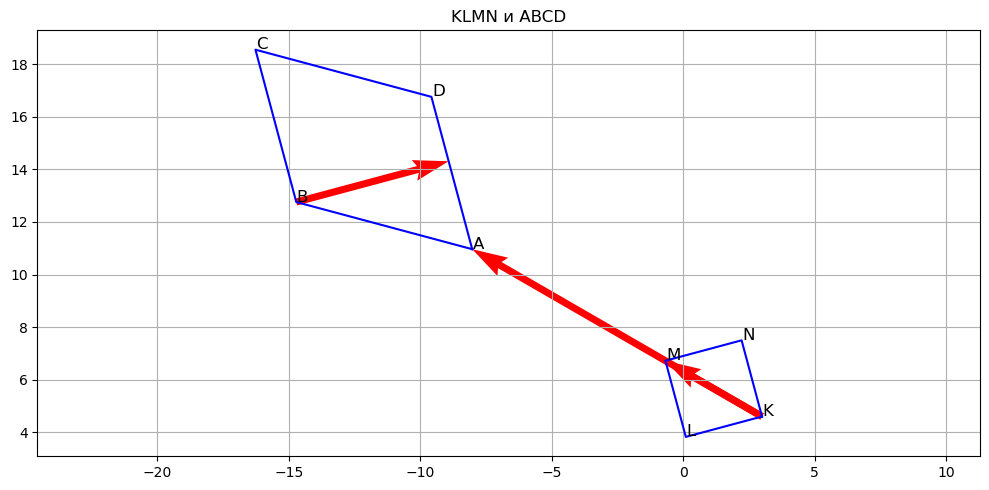

In [58]:
import numpy as np
import matplotlib.pyplot as plt


def plot_square(vertices, labels, style='b-'):
    vertices = np.hstack([vertices, vertices[:, :1]])
    plt.plot(vertices[0], vertices[1], style)
    for i, label in enumerate(labels):
        x = vertices[0, i]
        y = vertices[1, i]
        plt.text(x + 0.02, y + 0.02, label, fontsize=12, color='black')


a = 3

square_template = np.array([
    [0, 0, a, a],
    [0, a, a, 0],
    [1, 1, 1, 1]
])

KLMN = apply_transformation(rotation_matrix(7 * np.pi / 12, [0, 0], [3, 4.6]), square_template)
KN_vec = KLMN[:2, 3] - KLMN[:2, 0]
KM_vec = KLMN[:2, 2] - KLMN[:2, 0]
K = KLMN[:2, 0]
KN_angle = np.arctan2(KN_vec[1], KN_vec[0])
print('вектор KN:', KN_vec)
print('K:', K)
print('Угол, pi радиан:', KN_angle / np.pi)

F = rotation_matrix(KN_angle, [0, 0], K) @ shear_x_matrix(1 / np.sqrt(3), [3 * a, 3 * a]) @ stretch_y_matrix(
    2) @ stretch_x_matrix(2) @ rotation_matrix(
    -KN_angle, [0, 0]) @ translation_matrix(-K)
ABCD = apply_transformation(F, KLMN)
KLMN_labels = ['K', 'L', 'M', 'N']
ABCD_labels = ['A', 'B', 'C', 'D']

plt.figure(figsize=(10, 5))

# Исходный квадрат KLMN
# plt.subplot(1, 2, 1)
plot_square(KLMN, labels=KLMN_labels)
plot_square(ABCD, labels=ABCD_labels)
plt.title("KLMN и ABCD")
plt.grid()

plt.quiver(K[0], K[1], KM_vec[0], KM_vec[1], scale_units='xy', scale=1, color='red')
plt.quiver(K[0], K[1], KM_vec[0] * 3, KM_vec[1] * 3, scale_units='xy', scale=1, color='red')

plt.tight_layout()
plt.axis('equal')

AD_vec = ABCD[:2, 3] - ABCD[:2, 0]
AB_vec = ABCD[:2, 1] - ABCD[:2, 0]

print()
print('KN и AD паралелльны:', abs(KN_vec[0] * AD_vec[1] - KN_vec[1] * AD_vec[0]) < 1e-8)
print('длина AD (в сторонах квадрата):', np.linalg.norm(AD_vec) / a)
# Находим проекцию AB на AD
AD_direction = AD_vec / np.linalg.norm(AD_vec)
AD_proj = np.dot(AD_direction, AB_vec) * AD_direction
BH_vec = -(AB_vec - AD_proj)
B = ABCD[:2, 1]
plt.quiver(B[0], B[1], BH_vec[0], BH_vec[1], scale_units='xy', scale=1, color='red')
print('дина BH (в сторонах квадрата):', np.linalg.norm(BH_vec) / a)

cos_BAD = np.dot(AB_vec, AD_vec) / (np.linalg.norm(AB_vec) * np.linalg.norm(AD_vec))

BAD_angle = np.arccos(np.clip(cos_BAD, -1.0, 1.0))
print('Угол при A (в pi радиан):', BAD_angle / np.pi)

plt.show()


Разница в координатах между KLMN и F^-1(ABCD):
[[-4.44089210e-16 -8.88178420e-16 -1.33226763e-15 -4.44089210e-16]
 [ 8.88178420e-16  4.44089210e-16  0.00000000e+00  8.88178420e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]


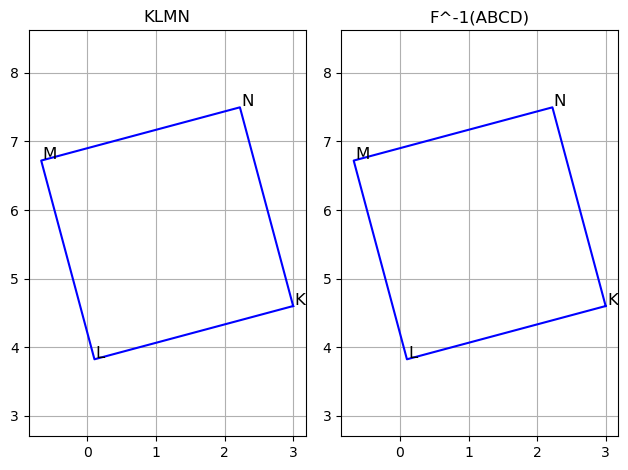

In [59]:
inv_F = np.linalg.inv(F)
ABCD_inv_transformed = apply_transformation(inv_F, ABCD)
print('Разница в координатах между KLMN и F^-1(ABCD):')
print(KLMN - ABCD_inv_transformed)

plt.subplot(1, 2, 1)
plot_square(KLMN, labels=KLMN_labels)
plt.title('KLMN')
plt.grid(True)
plt.axis('equal')

plt.subplot(1, 2, 2)
plot_square(ABCD_inv_transformed, labels=KLMN_labels)
plt.title('F^-1(ABCD)')
plt.grid(True)
plt.axis('equal')

plt.tight_layout()
plt.show()